In [4]:
import pandas as pd
import requests
import zipfile
import pathlib as p

import matplotlib.pyplot as plt
import scipy.interpolate as interp
import numpy as np

In [5]:
def get_rain_data (date):

    rain_data_url=f"https://odp.met.hu/weather/weather_reports/synoptic/hungary/daily_rain/csv/HABP_1RD_{date}.csv.zip"
    dir_path=f"../data/local/rain_data/{date}"
    file_path=f"../data/local/rain_data/{date}/HABP_1RD_{date}.csv.zip"

    p.Path(dir_path).mkdir(exist_ok=True)

    rain_data = requests.get(rain_data_url)
    with open(file_path, "wb")as file:
        file.write(rain_data.content)

    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(dir_path)

    rain_df = pd.read_csv(file_path,delimiter=";")
    return rain_df

In [7]:
date="20221022"

rain_df=pd.read_csv("/Users/benceszabo/Side/relief/app/cache/rain_data/20221022/HABP_1RD_20221022.csv",delimiter=";")
rain_df.head()

,Time,StationNumber,StationName,Latitude,Longitude,Elevation,r,Q_r,rh,Q_rh,rf1,Q_rf1,rf2,Q_rf2,EOR
0,20221022,13710,Fertőrákos,47.7147,16.6658,116.0,0.5,,0,,1,,0,,EOR
1,20221022,14704,Kőszeg,47.3833,16.5667,271.0,3.7,,0,,1,,-999,,EOR
2,20221022,14705,Peresznye,47.4233,16.6511,212.4,3.3,,0,,1,,-999,,EOR
3,20221022,14706,Sopronhorpács,47.4831,16.7353,197.0,2.3,,0,,1,,-999,,EOR
4,20221022,15311,Szombathely Gyöngyöshermán,47.2025,16.6617,198.3,3.4,,0,,1,,0,,EOR


In [8]:
rain_df.columns

Index(['    Time', 'StationNumber', 'StationName                             ',
       'Latitude', 'Longitude', 'Elevation', '     r', ' Q_r', '  rh', 'Q_rh',
       ' rf1', 'Q_rf1', ' rf2', 'Q_rf2', 'EOR'],
      dtype='object')

In [9]:
rain_df[rain_df["     r"]<0].head()

,Time,StationNumber,StationName,Latitude,Longitude,Elevation,r,Q_r,rh,Q_rh,rf1,Q_rf1,rf2,Q_rf2,EOR
11,20221022,16205,Szalafő,46.8667,16.3167,310.0,-999.0,,0,,-999,,-999,,EOR
36,20221022,27607,Kutas,46.3361,17.4597,158.0,-999.0,,0,,-999,,-999,,EOR
48,20221022,34436,Pilisvörösvár,47.6300,18.8975,198.0,-999.0,,0,,-999,,-999,,EOR
52,20221022,34713,Felcsút,47.4497,18.5875,149.0,-999.0,,0,,-999,,-999,,EOR
55,20221022,35419,Ráckeresztúr,47.2825,18.8244,111.0,-999.0,,0,,-999,,-999,,EOR


In [10]:
rain_df=rain_df[rain_df["     r"]>=0]

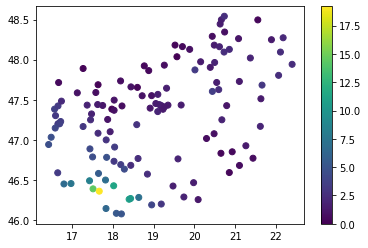

In [11]:
plt.scatter(rain_df["Longitude"],rain_df["Latitude"],c=rain_df["     r"])
plt.colorbar()


### Interpolation of the rain data
2D data --> f_rain (lat, long) = r

In [18]:
x=rain_df["Longitude"]
y=rain_df["Latitude"]
z=rain_df["     r"]

interpolator = interp.CloughTocher2DInterpolator(list(zip(x, y)), z)
interpolator_lin = interp.LinearNDInterpolator(list(zip(x, y)), z)
interpolator_NN = interp.NearestNDInterpolator(list(zip(x, y)), z)
interpolator_RBF = interp.RBFInterpolator(list(zip(x, y)), z)
interpolator_2d=interp.interp2d(x,y,z)



/Users/benceszabo/opt/miniconda3/envs/relief_sandbox/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,14 m=125 fp=2.811190 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [13]:
X = np.linspace(min(x), max(x), 500)
Y = np.linspace(min(y), max(y), 500)

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
# interpolate z data; same shape as xgrid and ygrid

Z = interpolator(X, Y)




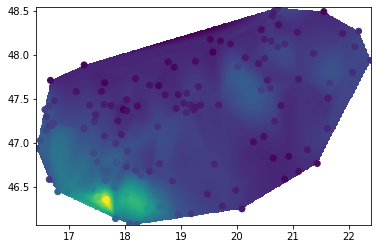

In [14]:
plt.pcolormesh(X, Y, Z, shading='auto')
plt.scatter(x,y,c=z)

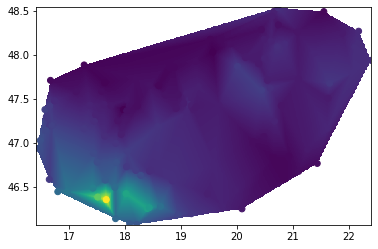

In [15]:
Z_lin=interpolator_lin(X,Y)
plt.pcolormesh(X, Y, Z_lin, shading='auto')
plt.scatter(x,y,c=z)

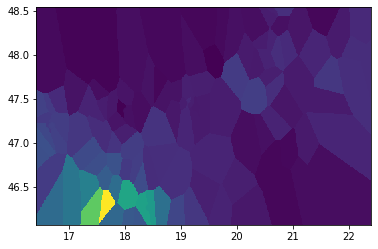

In [16]:
Z_NN=interpolator_NN(X,Y)
plt.pcolormesh(X, Y, Z_NN, shading='auto')
plt.scatter(x,y,c=z)

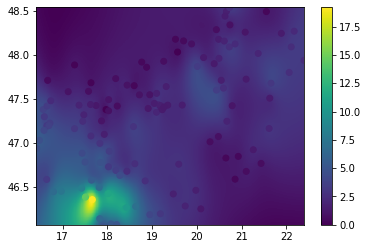

In [17]:

Z_RBF=interpolator_RBF(np.array([X,Y]).reshape(2, -1).T)
plt.pcolormesh(X, Y, Z_RBF.reshape(500, 500), shading='auto')
plt.scatter(x,y,c=z)
plt.colorbar()

/var/folders/j0/y36t88xs5z1fb7hd9lzv0qt00000gn/T/ipykernel_41625/3968673751.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, y, Z_2d, shading='auto')


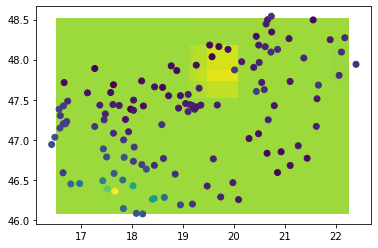

In [21]:
Z_2d=interpolator_2d(x,y)
plt.pcolormesh(x, y, Z_2d, shading='auto')
plt.scatter(x,y,c=z)

In [1]:
import os

In [3]:
os.listdir("https://odp.met.hu/weather/weather_reports/synoptic/hungary/daily_rain/csv")

FileNotFoundError: [Errno 2] No such file or directory: 'https://odp.met.hu/weather/weather_reports/synoptic/hungary/daily_rain/csv'